<a href="https://colab.research.google.com/github/B0ketto/Drug-Image-Classification/blob/main/majornb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os

In [ ]:
import cv2

In [ ]:
data_dir = '/content/drive/MyDrive/seperated'

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data_dir = 'data'

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/seperated', image_size=(256, 256), batch_size=32)

Found 7000 files belonging to 10 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

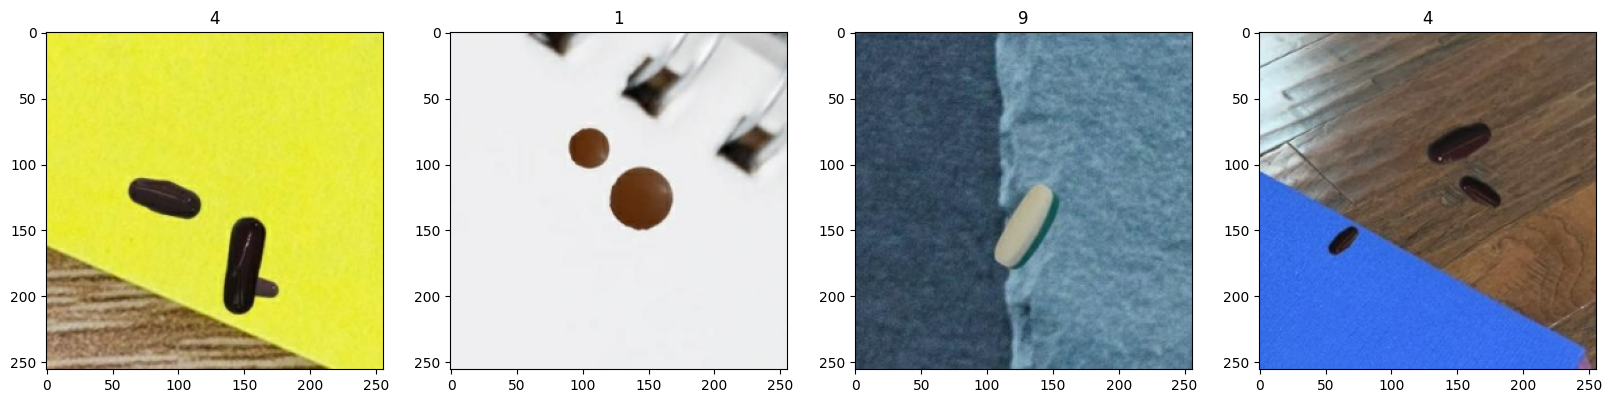

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[1]

array([4, 1, 9, 4, 8, 0, 6, 1, 9, 1, 0, 6, 9, 4, 1, 8, 9, 4, 7, 0, 4, 3,
       4, 1, 0, 9, 7, 8, 6, 5, 2, 2], dtype=int32)

In [ ]:
data = data.map(lambda x,y: (x/255, tf.one_hot(y, depth=10)))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.45194307, 0.40488425, 0.35782543],
          [0.5031286 , 0.45606977, 0.40901095],
          [0.50180733, 0.45474854, 0.40768972],
          ...,
          [0.65125924, 0.58851415, 0.52576905],
          [0.6364313 , 0.5736862 , 0.5109411 ],
          [0.6290252 , 0.5662801 , 0.50353503]],
 
         [[0.516305  , 0.46924618, 0.42218736],
          [0.47855726, 0.43149844, 0.38443962],
          [0.45674258, 0.40968376, 0.36262494],
          ...,
          [0.49734867, 0.43460357, 0.37185848],
          [0.56648   , 0.5037349 , 0.44098976],
          [0.6119375 , 0.5491924 , 0.48644733]],
 
         [[0.4415884 , 0.39452958, 0.34747076],
          [0.467109  , 0.42005017, 0.37299135],
          [0.48652893, 0.4394701 , 0.3924113 ],
          ...,
          [0.6739916 , 0.6112465 , 0.54850143],
          [0.7232326 , 0.66048753, 0.59774244],
          [0.7861714 , 0.7234262 , 0.6606811 ]],
 
         ...,
 
         [[0.41194543, 0.3374356 , 0.21978855],
          [0.44270

In [ ]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

In [ ]:
train_size

153

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
# Model 2
model.add(keras.Input(shape = (256,256,3)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
# model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, activation='relu', padding='same'))
# model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D())

model.add(Conv2D(256, 3, activation='relu', padding='same'))
# model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 dropout (Dropout)           (None, 128, 128, 128)     0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       2

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data = val, callbacks =[tensorboard_callback])

Epoch 1/10
153/153 [==============================] - 2005s 13s/step - loss: 2.9829 - accuracy: 0.0940 - val_loss: 2.3035 - val_accuracy: 0.0938
Epoch 2/10
153/153 [==============================] - 64s 416ms/step - loss: 2.3030 - accuracy: 0.0997 - val_loss: 2.3039 - val_accuracy: 0.0843
Epoch 3/10
153/153 [==============================] - 64s 416ms/step - loss: 2.3030 - accuracy: 0.1019 - val_loss: 2.3035 - val_accuracy: 0.0901
Epoch 4/10
153/153 [==============================] - 65s 419ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3040 - val_accuracy: 0.0923
Epoch 5/10
153/153 [==============================] - 65s 421ms/step - loss: 2.3108 - accuracy: 0.0982 - val_loss: 2.3039 - val_accuracy: 0.0938
Epoch 6/10
153/153 [==============================] - 62s 399ms/step - loss: 2.3041 - accuracy: 0.0989 - val_loss: 2.3043 - val_accuracy: 0.0901
Epoch 7/10
153/153 [==============================] - 63s 408ms/step - loss: 2.3028 - accuracy: 0.1017 - val_loss: 2.3038 - val_ac

In [ ]:
model1 = Sequential()

In [ ]:
# Model 2
model1.add(keras.Input(shape = (256,256,3)))
model1.add(Conv2D(64, 3, activation='relu', padding='same'))
model1.add(Conv2D(64, 3, activation='relu', padding='same'))
model1.add(MaxPooling2D())

model1.add(Conv2D(128, 3, activation='relu', padding='same'))
model1.add(Conv2D(128, 3, activation='relu', padding='same'))
model1.add(Dropout(0.5))
model1.add(MaxPooling2D())

model1.add(Conv2D(256, 3, activation='relu', padding='same'))
model1.add(Conv2D(256, 3, activation='relu', padding='same'))
model1.add(Dropout(0.5))
model1.add(MaxPooling2D())

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 dropout_2 (Dropout)         (None, 128, 128, 128)     0         
                                                      

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model1.fit(train, epochs=10, validation_data = val, callbacks =[tensorboard_callback])

Epoch 1/10
153/153 [==============================] - 117s 655ms/step - loss: 2.4335 - accuracy: 0.0980 - val_loss: 2.3037 - val_accuracy: 0.0865
Epoch 2/10
153/153 [==============================] - 102s 663ms/step - loss: 2.3029 - accuracy: 0.1046 - val_loss: 2.3039 - val_accuracy: 0.0865
Epoch 3/10
153/153 [==============================] - 102s 661ms/step - loss: 2.3028 - accuracy: 0.1033 - val_loss: 2.3039 - val_accuracy: 0.0872
Epoch 4/10
153/153 [==============================] - 102s 662ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3040 - val_accuracy: 0.0901
Epoch 5/10
153/153 [==============================] - 102s 663ms/step - loss: 2.3027 - accuracy: 0.1038 - val_loss: 2.3042 - val_accuracy: 0.0923
Epoch 6/10
153/153 [==============================] - 102s 662ms/step - loss: 2.3028 - accuracy: 0.1029 - val_loss: 2.3042 - val_accuracy: 0.0908
Epoch 7/10
153/153 [==============================] - 102s 662ms/step - loss: 2.3026 - accuracy: 0.0982 - val_loss: 2.3043 -

In [ ]:
# prompt: a neural network which works fine with my data

model2 = Sequential()
model2.add(keras.Input(shape = (256,256,3)))
model2.add(Conv2D(64, 3, activation='relu', padding='same'))
model2.add(Conv2D(64, 3, activation='relu', padding='same'))
model2.add(MaxPooling2D())

model2.add(Conv2D(128, 3, activation='relu', padding='same'))
model2.add(Conv2D(128, 3, activation='relu', padding='same'))
model2.add(Dropout(0.5))
model2.add(MaxPooling2D())

model2.add(Conv2D(256, 3, activation='relu', padding='same'))
model2.add(Conv2D(256, 3, activation='relu', padding='same'))
model2.add(Conv2D(256, 3, activation='relu', padding='same'))
model2.add(Dropout(0.5))
model2.add(MaxPooling2D())

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model2.fit(train, epochs=10, validation_data = val, callbacks =[tensorboard_callback])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 128)     0         
                                                      

In [ ]:
model2.evaluate(test)

21/21 [==============================] - 162s 7s/step - loss: 2.3042 - accuracy: 0.0997


[2.3041789531707764, 0.0997023805975914]

In [ ]:
# prompt: i would like to try transfer learning

base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

model3 = Sequential()
model3.add(keras.Input(shape = (256,256,3)))
model3.add(base_model)
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model3.fit(train, epochs=4, validation_data = val, callbacks =[tensorboard_callback])

model.evaluate(test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dense_18 (Dense)            (None, 512)               16777728  
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
Total params: 31626314 (120.64 MB)
Trainable params: 16911626 (64.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch

[2.304051160812378, 0.0982142835855484]

In [ ]:
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
input_shape = ( 256, 256, 3)

model_lstm = models.Sequential([
    layers.Reshape((-1,) + input_shape),  # Reshape to include the time dimension
    layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
    layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
    layers.TimeDistributed(layers.Flatten()),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(128, return_sequences=True),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
sample_batch = next(iter(data))
model_lstm(sample_batch[0])

<tf.Tensor: shape=(32, 10), dtype=float32, numpy=
array([[0.09980041, 0.09997913, 0.10028265, 0.09996446, 0.09994745,
        0.10000645, 0.10019027, 0.10004293, 0.0999359 , 0.09985031],
       [0.09991311, 0.10008035, 0.10014804, 0.09985771, 0.0998621 ,
        0.09995975, 0.10032565, 0.09996074, 0.10013546, 0.09975716],
       [0.09968979, 0.09991121, 0.10011699, 0.10009828, 0.0999163 ,
        0.09986769, 0.10012886, 0.10011792, 0.09991667, 0.10023624],
       [0.09974357, 0.09998387, 0.10003345, 0.10001685, 0.10003382,
        0.10000181, 0.1003102 , 0.10005591, 0.09977078, 0.10004973],
       [0.09974845, 0.10009711, 0.10009927, 0.100045  , 0.09985938,
        0.0999779 , 0.10019347, 0.10005309, 0.10007728, 0.09984916],
       [0.09986607, 0.10006937, 0.10018209, 0.10007167, 0.09977315,
        0.10001821, 0.10024416, 0.10007667, 0.09971814, 0.09998045],
       [0.09974826, 0.10007837, 0.10013716, 0.09999732, 0.09992088,
        0.09999389, 0.10028448, 0.1000296 , 0.09995971, 0.09

In [ ]:
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (32, 1, 256, 256, 3)      0         
                                                                 
 time_distributed (TimeDist  (32, 1, 254, 254, 32)     896       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (32, 1, 127, 127, 32)     0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (32, 1, 125, 125, 64)     18496     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (32, 1, 62, 62, 64)       0         
 stributed)                                             

In [ ]:
history = model_lstm.fit(train, epochs=10, validation_data=val)


Epoch 1/10
153/153 [==============================] - 1302s 9s/step - loss: 2.3044 - accuracy: 0.0946 - val_loss: 2.3028 - val_accuracy: 0.1083
Epoch 2/10
153/153 [==============================] - 41s 263ms/step - loss: 2.3034 - accuracy: 0.0919 - val_loss: 2.3033 - val_accuracy: 0.0908
Epoch 3/10
153/153 [==============================] - 41s 265ms/step - loss: 2.3033 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.0988
Epoch 4/10
153/153 [==============================] - 41s 265ms/step - loss: 2.3032 - accuracy: 0.0974 - val_loss: 2.3030 - val_accuracy: 0.0938
Epoch 5/10
153/153 [==============================] - 41s 264ms/step - loss: 2.3029 - accuracy: 0.0960 - val_loss: 2.3033 - val_accuracy: 0.0887
Epoch 6/10
153/153 [==============================] - 41s 264ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3031 - val_accuracy: 0.0974
Epoch 7/10
153/153 [==============================] - 40s 256ms/step - loss: 2.3026 - accuracy: 0.0962 - val_loss: 2.3036 - val_acc

In [ ]:
model_lstm.evaluate(test)

21/21 [==============================] - 113s 4s/step - loss: 2.3040 - accuracy: 0.0893


[2.3040149211883545, 0.0892857164144516]

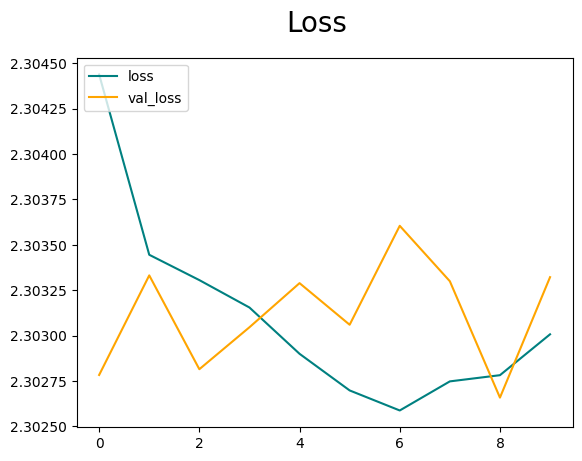

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# prompt: l1 regularize data
# testing loss needs to be below 0.4

from tensorflow.keras.regularizers import l1
model5 = Sequential()
model5.add(Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=l1(0.01)))
model5.add(MaxPooling2D())
model5.add(Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=l1(0.01)))
model5.add(Dropout(0.5))
model5.add(MaxPooling2D())
model5.add(Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=l1(0.01)))
model5.add(Dropout(0.5))
model5.add(MaxPooling2D())
model5.add(Flatten())
model5.add(Dense(512, activation='relu', kernel_regularizer=l1(0.01)))
model5.add(Dense(256, activation='relu', kernel_regularizer=l1(0.01)))
model5.add(Dense(10, activation='softmax'))
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist1 = model5.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


In [ ]:
# prompt: generate code that uses regularization with transfer learning

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Load the pre-trained VGG16 model with weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with L2 regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)

# Add a softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train, epochs=10, validation_data=val)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
153/153 [==============================] - 74s 427ms/step - loss: 3.2634 - accuracy: 0.1781 - val_loss: 2.3442 - val_accuracy: 0.2071
Epoch 2/10
153/153 [==============================] - 66s 429ms/step - loss: 2.2519 - accuracy: 0.2649 - val_loss: 2.1937 - val_accuracy: 0.2972
Epoch 3/10
153/153 [==============================] - 49s 317ms/step - loss: 2.1248 - accuracy: 0.3129 - val_loss: 2.0888 - val_accuracy: 0.3452
Epoch 4/10
153/153 [==============================] - 49s 317ms/step - loss: 2.0873 - accuracy: 0.3201 - val_loss: 2.0653 - val_accuracy: 0.3103
Epoch 5/10
153/153 [==============================] - 49s 313ms/step - loss: 2.0241 - accuracy: 0.3489 - val_loss: 2.0688 - val_accuracy: 0.3031
Epoch 6/10
153/153 [==============================] - 67s 432ms/step - loss: 1.9660 - accuracy: 0.3805 - val_loss: 1.9499 - val_accuracy: 0.3990
Epoch 7/10
153/153 [==============================] - 66s 431ms/s

In [ ]:
model.evaluate(test)

21/21 [==============================] - 61s 2s/step - loss: 1.8171 - accuracy: 0.4688


[1.8170808553695679, 0.46875]

# modelw variant 1
l2 regularization = 0.007
epoch=10

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Load the pre-trained VGG16 model with weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with L2 regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.007))(x)

# x = Dropout(0.5)(x)

# Add a softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train, epochs=10, validation_data=val)


Epoch 1/10
154/154 [==============================] - 203s 1s/step - loss: 3.0012 - accuracy: 0.1891 - val_loss: 2.2973 - val_accuracy: 0.2528
Epoch 2/10
154/154 [==============================] - 49s 312ms/step - loss: 2.1988 - accuracy: 0.3068 - val_loss: 2.1136 - val_accuracy: 0.2912
Epoch 3/10
154/154 [==============================] - 65s 421ms/step - loss: 2.0785 - accuracy: 0.3326 - val_loss: 1.9819 - val_accuracy: 0.4077
Epoch 4/10
154/154 [==============================] - 48s 305ms/step - loss: 1.9860 - accuracy: 0.3778 - val_loss: 1.9420 - val_accuracy: 0.3835
Epoch 5/10
154/154 [==============================] - 66s 425ms/step - loss: 1.9327 - accuracy: 0.4008 - val_loss: 1.8975 - val_accuracy: 0.4205
Epoch 6/10
154/154 [==============================] - 48s 305ms/step - loss: 1.8946 - accuracy: 0.4152 - val_loss: 1.9205 - val_accuracy: 0.4318
Epoch 7/10
154/154 [==============================] - 49s 313ms/step - loss: 1.8431 - accuracy: 0.4456 - val_loss: 1.7835 - val_accu

In [ ]:
model.evaluate(test)

22/22 [==============================] - 33s 481ms/step - loss: 1.7316 - accuracy: 0.5365


[1.7315665483474731, 0.5365496873855591]

# modelw variant 2
l2 regularization = 0.007
epochs = 20

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Load the pre-trained VGG16 model with weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with L2 regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.007))(x)

# x = Dropout(0.5)(x)

# Add a softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Create the new model
modelx = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
modelx.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
modelx.fit(train, epochs=20, validation_data=val)


58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/20
153/153 [==============================] - 2057s 13s/step - loss: 3.0060 - accuracy: 0.2122 - val_loss: 2.3224 - val_accuracy: 0.2406
Epoch 2/20
153/153 [==============================] - 65s 422ms/step - loss: 2.1901 - accuracy: 0.3194 - val_loss: 2.0752 - val_accuracy: 0.4179
Epoch 3/20
153/153 [==============================] - 66s 429ms/step - loss: 2.0704 - accuracy: 0.3542 - val_loss: 2.0189 - val_accuracy: 0.3641
Epoch 4/20
153/153 [==============================] - 67s 434ms/step - loss: 1.9789 - accuracy: 0.3944 - val_loss: 1.9810 - val_accuracy: 0.3706
Epoch 5/20
153/153 [==============================] - 50s 322ms/step - loss: 1.9248 - accuracy: 0.4062 - val_loss: 1.9452 - val_accuracy: 0.3757
Epoch 6/20
153/153 [==============================] - 50s 321ms/step - loss: 1.8879 - accuracy: 0.4181 - val_loss: 1.8317 - val_accuracy: 0.4942
Epoch 7/20
153/153 [==============================] - 51s 328ms/s

In [ ]:
modelx.evaluate(test)

21/21 [==============================] - 157s 7s/step - loss: 1.5531 - accuracy: 0.5774


[1.5531435012817383, 0.5773809552192688]

# modelw variant 3
l2 regularization = 0.07
epochs = 50

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Load the pre-trained VGG16 model with weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with L2 regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.007))(x)

# x = Dropout(0.5)(x)

# Add a softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Create the new model
modely = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
modely.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
modely.fit(train, epochs=50, validation_data=val)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
153/153 [==============================] - 559s 4s/step - loss: 3.0128 - accuracy: 0.1975 - val_loss: 2.3188 - val_accuracy: 0.2863
Epoch 2/50
153/153 [==============================] - 50s 321ms/step - loss: 2.2077 - accuracy: 0.3078 - val_loss: 2.1235 - val_accuracy: 0.3692
Epoch 3/50
153/153 [==============================] - 66s 429ms/step - loss: 2.0793 - accuracy: 0.3466 - val_loss: 2.0061 - val_accuracy: 0.3772
Epoch 4/50
153/153 [==============================] - 49s 319ms/step - loss: 1.9912 - accuracy: 0.3787 - val_loss: 1.9564 - val_accuracy: 0.4033
Epoch 5/50
153/153 [==============================] - 50s 320ms/step - loss: 1.9307 - accuracy: 0.4003 - val_loss: 1.9148 - val_accuracy: 0.4004
Epoch 6/50
153/153 [==============================] - 67s 433ms/step - loss: 1.8936 - accuracy: 0.4114 - val_loss: 1.8644 - val_accuracy: 0.4578
Epoch 7/50
153/153 [==============================] - 50s 320ms/ste

In [ ]:
modely.evaluate(test)

21/21 [==============================] - 52s 2s/step - loss: 1.3935 - accuracy: 0.6310


[1.3934521675109863, 0.6309523582458496]

# l2 regularization = 0.02
increasing l2 reguarization doesnt do any good in our case

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with L2 regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.02))(x)

# Add a softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
153/153 [==============================] - 50s 311ms/step - loss: 3.9909 - accuracy: 0.1401 - val_loss: 2.3722 - val_accuracy: 0.1701
Epoch 2/10
153/153 [==============================] - 47s 304ms/step - loss: 2.3122 - accuracy: 0.1967 - val_loss: 2.2394 - val_accuracy: 0.2791
Epoch 3/10
153/153 [==============================] - 48s 308ms/step - loss: 2.2306 - accuracy: 0.2328 - val_loss: 2.1817 - val_accuracy: 0.2631
Epoch 4/10
153/153 [==============================] - 49s 319ms/step - loss: 2.1854 - accuracy: 0.2551 - val_loss: 2.1333 - val_accuracy: 0.3285
Epoch 5/10
153/153 [==============================] - 48s 311ms/step - loss: 2.1404 - accuracy: 0.2766 - val_loss: 2.1055 - val_accuracy: 0.2805
Epoch 6/10
153/153 [==============================] - 48s 306ms/step - loss: 2.1081 - accuracy: 0.2851 - val_loss: 2.0643 - val_accuracy: 0.3547
Epoch 7/10
153/153 [==============================] - 48s 307ms/step - loss: 2.0885 - accuracy: 0.2874 - val_loss: 2.0222 - val_ac

In [ ]:
model.evaluate(test)

21/21 [==============================] - 23s 157ms/step - loss: 1.9788 - accuracy: 0.3676


[1.9787521362304688, 0.3675595223903656]

# Accuracy slightly higher than modelw
l2 regualrization = 0.08
epochs =100

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Load the pre-trained VGG16 model with weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with L2 regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.008))(x)

# x = Dropout(0.5)(x)

# Add a softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Create the new model
modelz = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
modelz.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
modelz.fit(train, epochs=100, validation_data=val)

Epoch 1/100
153/153 [==============================] - 59s 320ms/step - loss: 3.0845 - accuracy: 0.1846 - val_loss: 2.3132 - val_accuracy: 0.2725
Epoch 2/100
153/153 [==============================] - 48s 306ms/step - loss: 2.2218 - accuracy: 0.2770 - val_loss: 2.1161 - val_accuracy: 0.3132
Epoch 3/100
153/153 [==============================] - 49s 315ms/step - loss: 2.0949 - accuracy: 0.3380 - val_loss: 2.0771 - val_accuracy: 0.3219
Epoch 4/100
153/153 [==============================] - 49s 314ms/step - loss: 2.0255 - accuracy: 0.3505 - val_loss: 1.9849 - val_accuracy: 0.4113
Epoch 5/100
153/153 [==============================] - 49s 314ms/step - loss: 1.9722 - accuracy: 0.3652 - val_loss: 1.9107 - val_accuracy: 0.4375
Epoch 6/100
153/153 [==============================] - 49s 311ms/step - loss: 1.9190 - accuracy: 0.4126 - val_loss: 1.8731 - val_accuracy: 0.4906
Epoch 7/100
153/153 [==============================] - 48s 309ms/step - loss: 1.8917 - accuracy: 0.4124 - val_loss: 1.8908 -

In [ ]:
modelz.evaluate(test)

21/21 [==============================] - 24s 149ms/step - loss: 1.2475 - accuracy: 0.6577


[1.2474671602249146, 0.6577380895614624]

# modelw variant 4
l2 regualrization = 0.07
epochs =100

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Load the pre-trained VGG16 model with weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with L2 regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.007))(x)

# x = Dropout(0.5)(x)

# Add a softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Create the new model
modelw = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
modelw.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelw.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = modelw.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
153/153 [==============================] - 56s 298ms/step - loss: 3.0163 - accuracy: 0.2010 - val_loss: 2.2752 - val_accuracy: 0.2900
Epoch 2/100
153/153 [==============================] - 47s 303ms/step - loss: 2.1996 - accuracy: 0.3066 - val_loss: 2.1465 - val_accuracy: 0.3154
Epoch 3/100
153/153 [==============================] - 66s 431ms/step - loss: 2.0798 - accuracy: 0.3370 - val_loss: 1.9767 - val_accuracy: 0.4419
Epoch 4/100
153/153 [==============================] - 47s 306ms/step - loss: 2.0229 - accuracy: 0.3517 - val_loss: 1.9347 - val_accuracy: 0.4360
Epoch 5/100
153/153 [==============================] - 50s 320ms/step - loss: 1.9404 - accuracy: 0.4056 - val_loss: 1.8872 - val_accuracy: 0.4106
Epoch 6/100
153/153 [==============================] - 49s 317ms/step - loss: 1.9028 - accuracy: 0.4124 - val_loss: 1.8796 - val_accuracy: 0.4331
Epoch 7/100
153/153 [==============================] - 48s 311ms/step - loss: 1.8671 - accuracy: 0.4252 - val_loss: 1.8232 -

In [ ]:
modelw.evaluate(test)

21/21 [==============================] - 24s 156ms/step - loss: 1.2480 - accuracy: 0.6518


[1.2480452060699463, 0.6517857313156128]

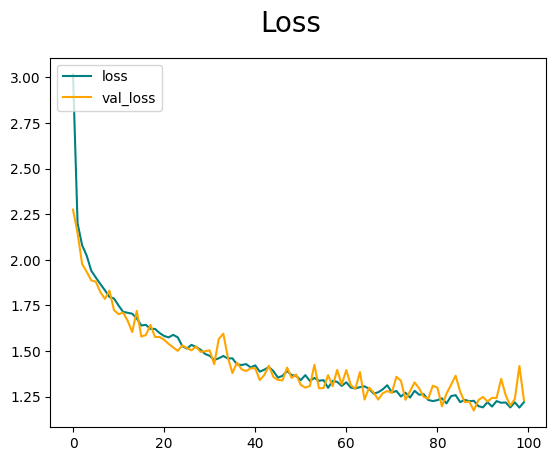

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

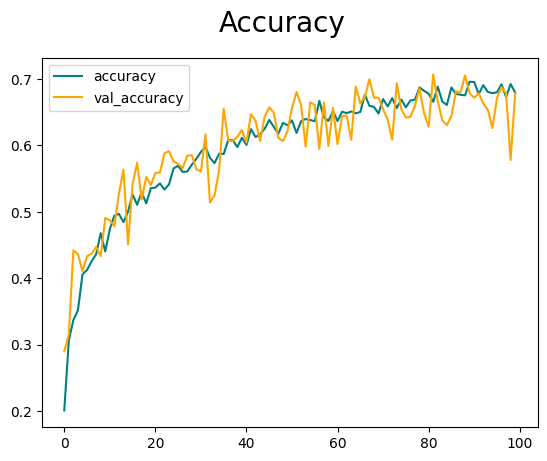

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Load the pre-trained ResNet50 model with weights
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with L2 regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)

# Add a softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Create the new model
modelv = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
modelv.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
modelv.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_9[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0]

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Train the model on your data
hist2 = modelv.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

# Evaluate the model on the test data
modelv.evaluate(test)

Epoch 1/10
153/153 [==============================] - 55s 292ms/step - loss: 4.7138 - accuracy: 0.5715 - val_loss: 2.3007 - val_accuracy: 0.6759
Epoch 2/10
153/153 [==============================] - 63s 405ms/step - loss: 1.7396 - accuracy: 0.7000 - val_loss: 1.6330 - val_accuracy: 0.6490
Epoch 3/10
153/153 [==============================] - 63s 409ms/step - loss: 1.2831 - accuracy: 0.7157 - val_loss: 1.3001 - val_accuracy: 0.6940
Epoch 4/10
153/153 [==============================] - 64s 412ms/step - loss: 1.1151 - accuracy: 0.7357 - val_loss: 1.1519 - val_accuracy: 0.7144
Epoch 5/10
153/153 [==============================] - 62s 403ms/step - loss: 1.0705 - accuracy: 0.7449 - val_loss: 1.1100 - val_accuracy: 0.7369
Epoch 6/10
153/153 [==============================] - 65s 417ms/step - loss: 1.0883 - accuracy: 0.7343 - val_loss: 1.0796 - val_accuracy: 0.7522
Epoch 7/10
153/153 [==============================] - 64s 415ms/step - loss: 1.0393 - accuracy: 0.7420 - val_loss: 1.1146 - val_ac

[1.089806079864502, 0.7217261791229248]

In [ ]:
# prompt: what are some other image classification models that can be used in transfer learning

* VGG19
* ResNet152
* InceptionV3
* Xception
* DenseNet121
* MobileNetV2
* EfficientNetB0


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Load the pre-trained ResNet50 model with weights
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with L2 regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)

# Add a softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Create the new model
modelu = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
modelu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
modelu.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 127, 127, 32)         864       ['input_11[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 127, 127, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 127, 127, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Train the model on your data
hist2 = modelu.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

# Evaluate the model on the test data
model.evaluate(test)

Epoch 1/10
153/153 [==============================] - 61s 332ms/step - loss: 3.5879 - accuracy: 0.5705 - val_loss: 1.7411 - val_accuracy: 0.6112
Epoch 2/10
153/153 [==============================] - 52s 332ms/step - loss: 1.4479 - accuracy: 0.6530 - val_loss: 1.3508 - val_accuracy: 0.6519
Epoch 3/10
153/153 [==============================] - 52s 333ms/step - loss: 1.3079 - accuracy: 0.6642 - val_loss: 1.2659 - val_accuracy: 0.6853
Epoch 4/10
153/153 [==============================] - 53s 339ms/step - loss: 1.2654 - accuracy: 0.6818 - val_loss: 1.2047 - val_accuracy: 0.7093
Epoch 5/10
153/153 [==============================] - 68s 440ms/step - loss: 1.2608 - accuracy: 0.6767 - val_loss: 1.2307 - val_accuracy: 0.6977
Epoch 6/10
153/153 [==============================] - 68s 441ms/step - loss: 1.2352 - accuracy: 0.6883 - val_loss: 1.3040 - val_accuracy: 0.6686
Epoch 7/10
153/153 [==============================] - 52s 332ms/step - loss: 1.2130 - accuracy: 0.6885 - val_loss: 1.2522 - val_ac

[1.2617452144622803, 0.6622023582458496]